In [ ]:
#!pip install opencv-python
#!pip install pip --upgrade --user
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.9 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob
import visualkeras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
directory=pathlib.Path(r"C:\Users\vamsi\Documents\Yoga\output_frames\TRAIN")

In [5]:
data = []

for filename in os.listdir("."):
    if filename.endswith("jpg"):
        print(filename)
        data.append(filename)

In [6]:
image_count=len(list(directory.glob('*/*.jpg')))
image_count

1647

In [9]:

yoga_images={
    "Balasana":list(directory.glob('Balasana/*.jpg')),
    "Chakrasana":list(directory.glob('Chakrasana/*.jpg')),
    "Chaturanga dandasana":list(directory.glob('Chaturanga_dandasana/*.jpg')),
    "Ustrasana":list(directory.glob('Ustrasana/*.jpg')),
    "Viparita karani":list(directory.glob('Viparita_karani/*.jpg')),
}

In [10]:
yoga_images

{'Balasana': [WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0000.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0001.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0002.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0003.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0004.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0005.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0006.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0007.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0008.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0009.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Bal

In [11]:
keys=['Balasana', 'Chakrasana','Chaturanga dandasana','Ustrasana','Viparita karani']

In [12]:

resized,labels=[],[]
for yoga_name,images in yoga_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(yoga_name))
yoga_images

{'Balasana': [WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0000.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0001.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0002.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0003.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0004.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0005.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0006.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0007.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0008.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Balasana/frame_0009.jpg'),
  WindowsPath('C:/Users/vamsi/Documents/Yoga/output_frames/TRAIN/Bal

In [13]:
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

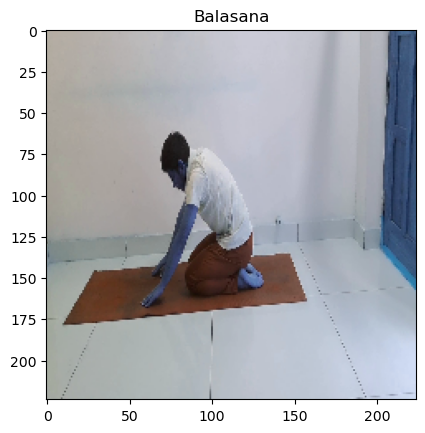

In [15]:
print_image(x_train[15],y_train[15])

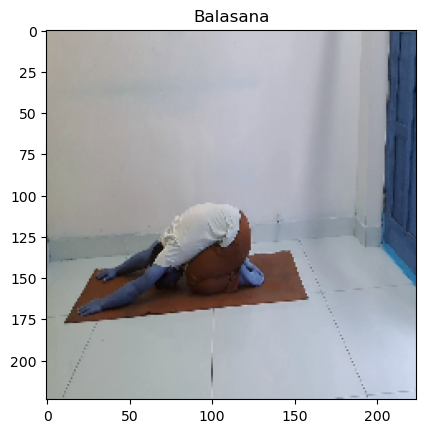

In [16]:
print_image(x_test[6],y_test[6])

In [17]:
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [18]:
x_train_scaled.shape

(647, 224, 224, 3)

In [19]:
y_train=np.array(y_train)
y_train.shape

(647,)

In [20]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

In [21]:
model = VGG16(weights="imagenet")
for i in model.layers:
    i.trainable =  False



553467096/553467096 [==============================] - 153s 0us/step


In [22]:
model1 = Sequential()

for i in range(18):
    model1.add(model.layers[i])

In [23]:
model1.add(Flatten())
model1.add(Dense(4096,activation="relu"))
model1.add(Dense(2098,activation="relu"))
model1.add(Dense(12,activation="Softmax"))

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model1.fit(x_train_scaled,np.array(y_train),epochs=20,callbacks=[callbacks])


Epoch 1/20


 1/21 [>.............................] - ETA: 38:45 - loss: 2.5277 - accuracy: 0.1875

In [ ]:
score = model1.evaluate(x_test_scaled,np.array(y_test))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
  import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
model1.save("PhysioNet.h5")

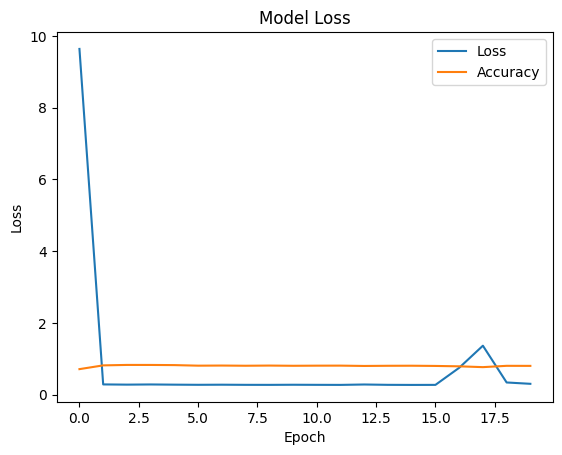

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

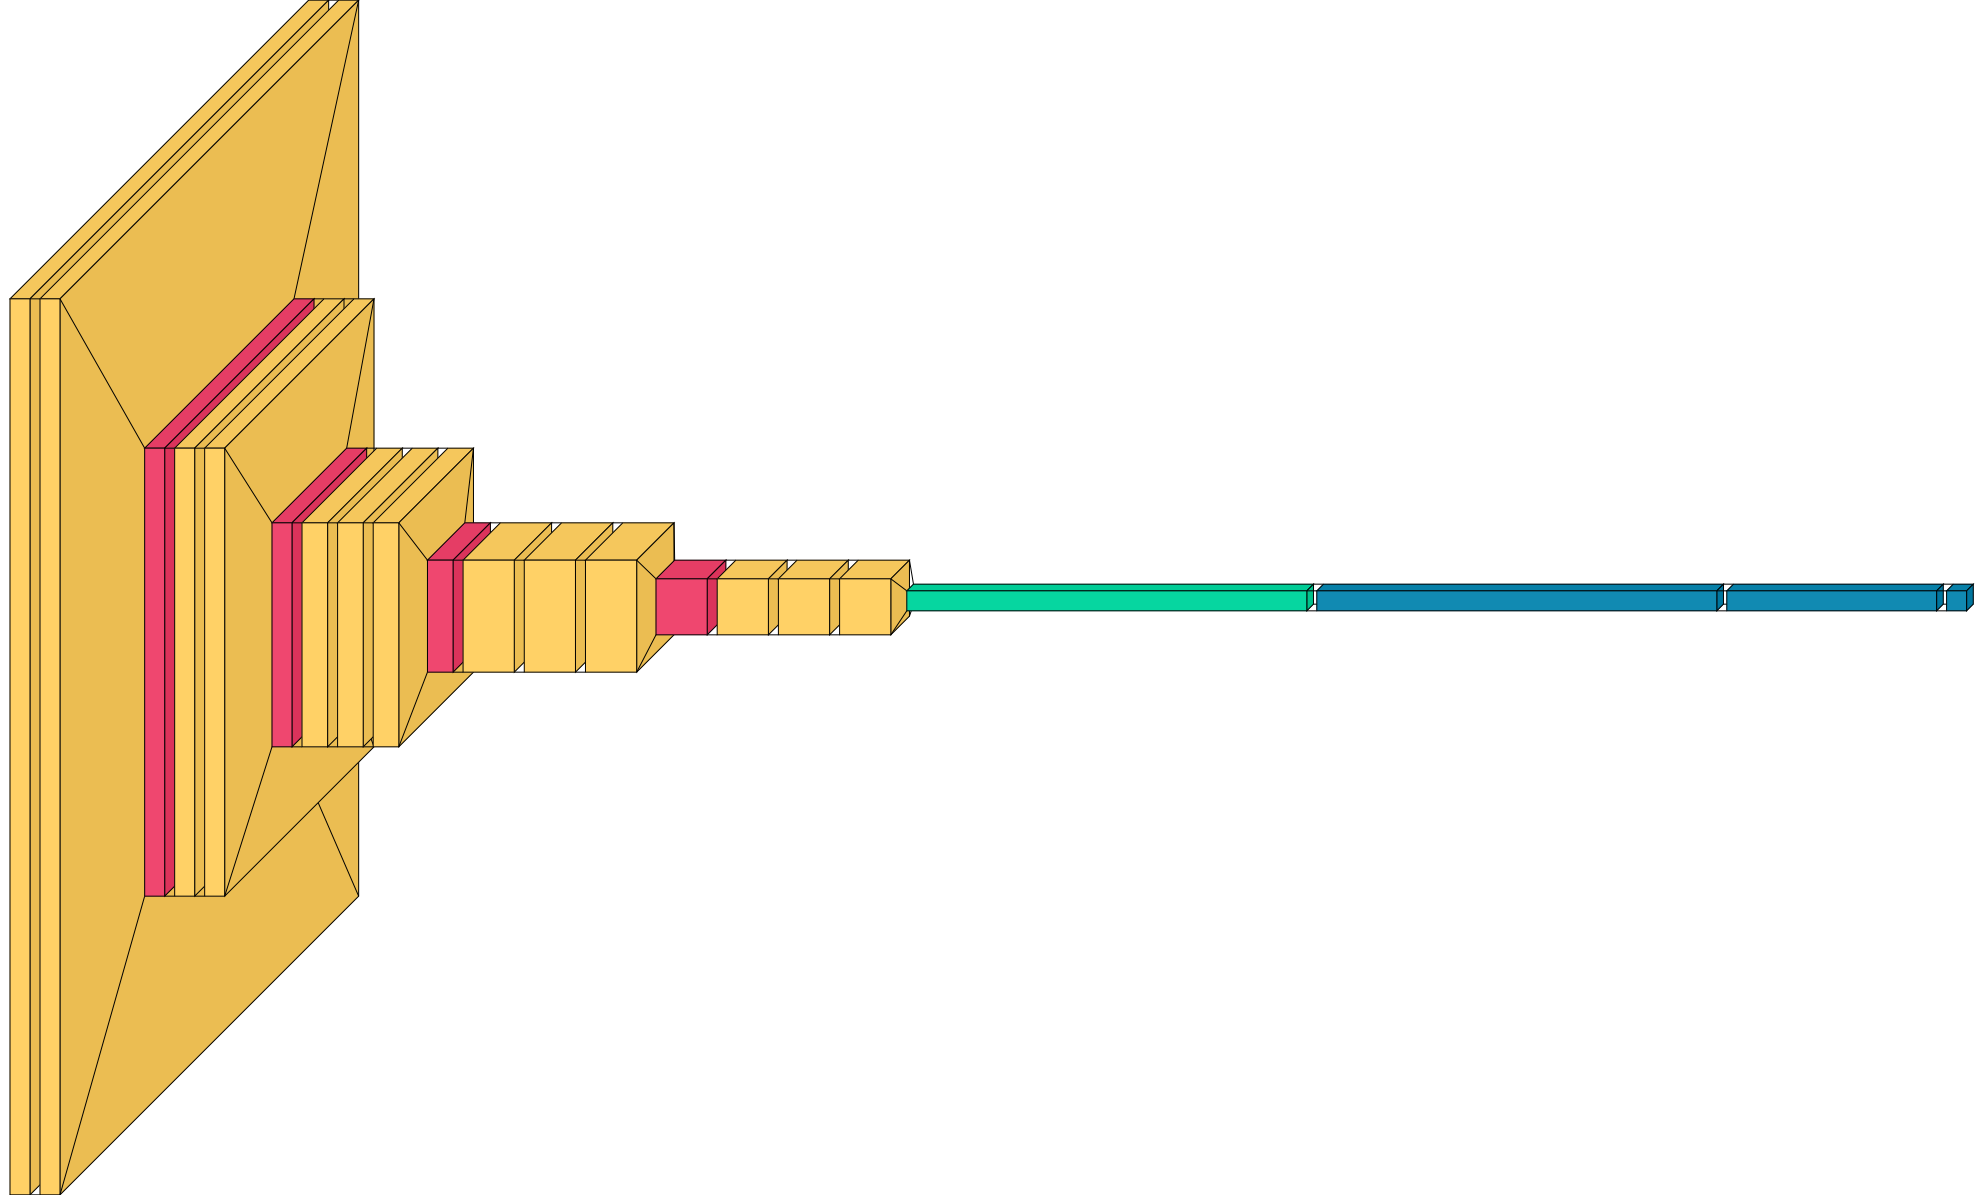

In [ ]:
visualkeras.layered_view(model1)